<a href="https://colab.research.google.com/github/wayne0git/ml_cv_basics/blob/master/contour_detection/contour_detection_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contour Detection based on OpenCV
Ref - https://learnopencv.com/contour-detection-using-opencv-python-c/

In [2]:
import cv2  # 4.1.2
import matplotlib.pyplot as plt

### Parameter

In [3]:
BINARY_THRESH = 150
BINARY_MAXVAL = 255
BINARY_TYPE = cv2.THRESH_BINARY # Value > BINARY_THRESH => BINARY_MAXVAL

In [9]:
CONTOUR_MODES = [cv2.RETR_LIST, cv2.RETR_EXTERNAL, cv2.RETR_CCOMP, cv2.RETR_TREE]
CONTOUR_MODES_STR = ['LIST', 'EXTERNAL', 'CCOMP', 'TREE']
CONTOUR_METHODS = [cv2.CHAIN_APPROX_NONE, cv2.CHAIN_APPROX_SIMPLE]
CONTOUR_METHODS_STR = ['NONE', 'SIMPLE']

### Load Data

In [5]:
im = cv2.imread('1.jpg')

### Preprocessing

In [6]:
# Convert to gray
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [7]:
# Binary threshold
_, thresh = cv2.threshold(gray, BINARY_THRESH, BINARY_MAXVAL, BINARY_TYPE)

### Contour Detection

Method - 
1. None : Store all points of the contour
2. Simple : Store only cornet point of the contour

Mode - 
1. RETR_LIST : Does not create parent child relationship between contours
2. RETR_EXTERNAL : Only detects the parent contours
3. RETR_CCOMP : Retrieve all the contours. Apply only 2-level hierarchy
4. RETR_TREE : Retrieve all the contours. Apply complete hierarchy



Hierarchy Format (1, #Contour, 4)
- [Next, Previous, First_Child, Parent] 

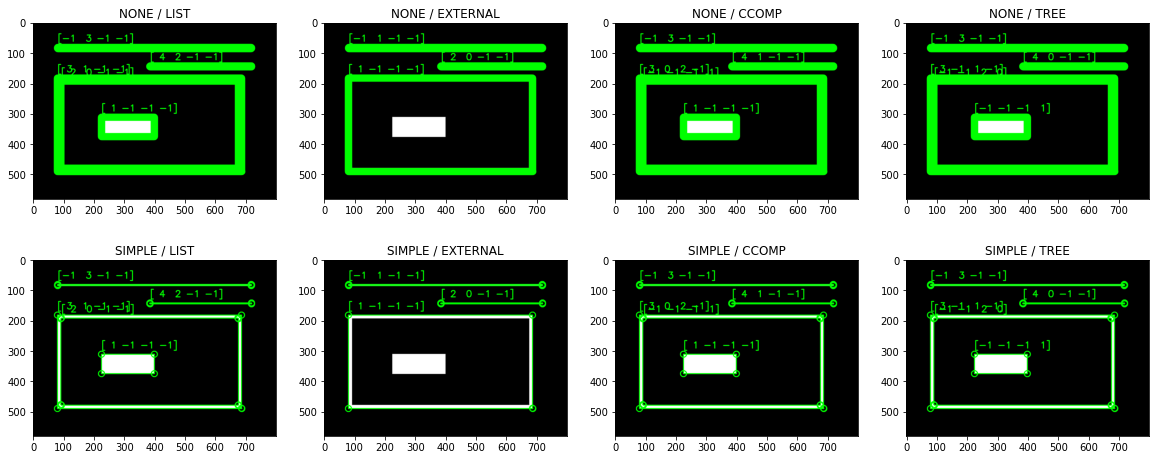

In [26]:
fig = plt.figure(figsize=(20, 8))

plt_cnt = 1
for method, method_str in zip(CONTOUR_METHODS, CONTOUR_METHODS_STR):
    for mode, mode_str in zip(CONTOUR_MODES, CONTOUR_MODES_STR):
        # Contour Detection
        contours, hierarchy = cv2.findContours(thresh, mode=mode, method=method)

        # Draw detected contour (contourIdx=-1 to draw all contours)
        im_show = im.copy()
        cv2.drawContours(im_show, contours=contours, contourIdx=-1,
                 color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

        # Draw each point of detected contour
        for ind, contour in enumerate(contours):
            for ind2, contour_pt in enumerate(contour):
                if ind2 == 0:
                    cv2.putText(im_show, str(hierarchy[0][ind]), ((contour_pt[0][0], contour_pt[0][1] - 20)),
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
                cv2.circle(im_show, ((contour_pt[0][0], contour_pt[0][1])), 10, (0, 255, 0), 2, cv2.LINE_AA)

        plt.subplot(2, 4, plt_cnt)
        plt.imshow(im_show)
        plt.title('%s / %s' % (method_str, mode_str))
        plt_cnt += 1